In [4]:
%matplotlib inline
from keras.layers.core import Dropout, Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
from keras.losses import binary_crossentropy 
from keras_preprocessing.image import ImageDataGenerator #for image preprocessing
import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [5]:
train_data = r'C:\Users\fabio\Documents\DataSets\cell_images\train_base\train_data'
validation_data = r'C:\Users\fabio\Documents\DataSets\cell_images\train_base\validation_data'
test_data = r'C:\Users\fabio\Documents\DataSets\cell_images\test_data'

In [6]:
def loss_val_curves(epochs=0, train_loss=0.0, val_loss=0.0, train_acc=0.0, val_acc=0.0):
    plt.plot(epochs, train_loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()
    plt.clf()

    plt.plot(epochs, train_acc, 'bo', label='Training Acc')
    plt.plot(epochs, val_acc, 'b', label='Validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Acc')
    plt.legend()

    plt.show()
    plt.clf()

In [7]:
train_batch_size = 100
val_batch_size = 55
train_data_size = 12000
val_data_size = 10780
train_steps = train_data_size / train_batch_size
val_steps = val_data_size / val_batch_size

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    directory=train_data,
    target_size=(60, 60),
    class_mode='binary',
    batch_size=train_batch_size
)

Found 12000 images belonging to 2 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_data,
    target_size=(60, 60),
    batch_size=val_batch_size,
    class_mode='binary'
)

Found 10780 images belonging to 2 classes.


In [10]:
callback_list = [EarlyStopping(patience=5, monitor='acc')]

In [11]:
model = Sequential([Conv2D(12, (5, 5), activation='relu', input_shape=(60, 60, 3)),
                    Conv2D(32, (3, 3), activation='relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(2, 2),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu'),
                    Dropout(0.1),
                    Conv2D(142, (1, 1), activation='relu'),
                    Conv2D(152, (1, 1), activation='relu'),
                    MaxPooling2D(2, 2),
                    Conv2D(164, (1, 1), activation='relu'),
                    Conv2D(182, (1, 1), activation='relu'),
                    Conv2D(200, (1, 1), activation='relu'),
                    MaxPooling2D(2, 2),
                    MaxPooling2D(1, 1),
                    BatchNormalization(),
                    Flatten(),
                    Dense(200, activation='relu'),
                    Dense(1, activation='sigmoid')])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss=binary_crossentropy,
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [13]:
hist = model.fit_generator(train_generator,
                           steps_per_epoch=train_steps,
                           epochs=15,
                           validation_steps=val_steps,
                           validation_data=validation_generator,
                           callbacks=callback_list,
                           )

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
120/120 [==============================] - 571s 5s/step - loss: 0.5321 - acc: 0.7715 - val_loss: 0.6281 - val_acc: 0.8647
Epoch 2/15
120/120 [==============================] - 79s 655ms/step - loss: 0.2741 - acc: 0.8974 - val_loss: 0.5289 - val_acc: 0.8297
Epoch 3/15
120/120 [==============================] - 82s 686ms/step - loss: 0.2563 - acc: 0.9038 - val_loss: 1.1158 - val_acc: 0.5454
Epoch 4/15
120/120 [==============================] - 82s 684ms/step - loss: 0.2177 - acc: 0.9219 - val_loss: 0.3032 - val_acc: 0.9246
Epoch 5/15
120/120 [==============================] - 88s 736ms/step - loss: 0.2031 - acc: 0.9323 - val_loss: 0.2401 - val_acc: 0.9352
Epoch 6/15
120/120 [==============================] - 84s 699ms/step - loss: 0.1982 - acc: 0.9315 - val_loss: 0.1947 - val_acc: 0.9481
Epoch 7/15
120/120 [==============================] - 81s 675ms/step - loss: 0.1869 - acc: 0.9367 - val_loss: 0.1926 - val_acc: 0.9404
Epoch 8/1

In [14]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, 1 + len(loss))

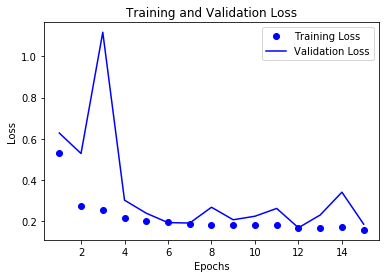

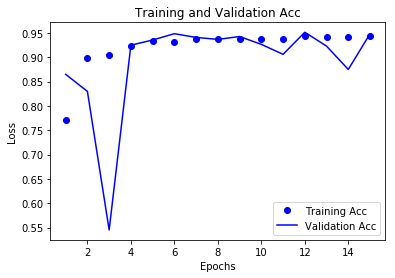

<Figure size 432x288 with 0 Axes>

In [15]:
loss_val_curves(epochs, train_loss=loss, train_acc=train_acc, val_loss=val_loss, val_acc=val_acc)

In [ ]:
#Fits the model using a pretrained convnet.

In [ ]:
from keras.applications.vgg16 import VGG16
VGG16(weights='imagenet',
     include_top=False,
     input_shape=(60, 60, 3)).summary()

In [1]:
def pretrained_model(num_units, trainable=False, output_units=1, act='sigmoid'):
    conv_base = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(60, 60, 3))
    model = Sequential([conv_base,
                        Flatten(),
                        Dense(num_units, activation='relu'),
                        Dense(output_units, activation=act)])
    model.trainable = trainable
    return model

In [ ]:
pretrained_mod = pretrained_model(num_units=150, trainable=True)

In [ ]:
pretrained_mod.compile(loss=binary_crossentropy,
                       optimizer=Adam(lr=0.001),
                       metrics=['acc'])

In [ ]:
pretrained_hist = pretrained_mod.fit_generator(train_generator,
                                    steps_per_epoch=train_steps,
                                    epochs=15,
                                    validation_steps=val_steps,
                                    validation_data=validation_generator,
                                    callbacks=callback_list,
                                   )

In [ ]:
loss = pretrained_hist.history['loss']
val_loss = pretrained_hist.history['val_loss']

train_acc = pretrained_hist.history['acc']
val_acc = pretrained_hist.history['val_acc']

epochs = range(1, 1 + len(loss))

In [ ]:
loss_val_curves(epochs, train_loss=loss, train_acc=train_acc, val_loss=val_loss, val_acc=val_acc)

In [ ]:
###############################################

In [ ]:
#Evaluates the model's accuracy on the test set.

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(directory=test_data,
                                                  target_size=(60, 60),
                                                  batch_size=1,
                                                  class_mode='binary',
                                                  shuffle=False,
                                                  color_mode='rgb'
                                                  )

Found 4778 images belonging to 2 classes.


In [17]:
test_samples = 4778 
probabilities = model.predict_generator(test_generator, steps=test_samples)

In [18]:
ground_truth = test_generator.classes

In [29]:
def convert_to_class(probabilities):
    classes = []
    for i in probabilities:
        if i > 0.5:
            classes.append(1)
        else:
            classes.append(0)
    return classes

In [22]:
from sklearn.metrics import accuracy_score
predictions = np.array(convert_to_class(probabilities))
print('Test Accuracy: %.2f' % accuracy_score(ground_truth, predictions))

Test Accuracy: 0.95


In [24]:
model.save(r'C:\Users\fabio\Documents\models\malaria_detection_model.h5')

In [25]:
from keras.models import load_model
loaded_model = load_model(r'C:\Users\fabio\Documents\models\malaria_detection_model.h5')

In [26]:
probabilities = loaded_model.predict_generator(test_generator, steps=test_samples)

In [31]:
predictions = np.array(convert_to_class(probabilities))

In [32]:
print('Test Accuracy: %.2f' % accuracy_score(ground_truth, predictions))

Test Accuracy: 0.95
